# 內容最後更新時間：2020/06/02

# 計算機程式期末專案：超級明星臉

<img src="說明圖片/title.png">

**組員名單：**  
* 108303067 會計一 杜淑萍  
* 105306019 資管四 陳宇鑫 (組長)
* 105308035 風管四 黃偉竣  
* 105308045 風管四 林庭萱

**專案分工：**
* 杜淑萍：蒐集及整理資料(女明星 part1)、建立模型、上台報告
* 陳宇鑫：蒐集及整理資料(男明星 part1)、建立模型、主程式(這份ipynb檔案的內容)、投影片內容、上台報告
* 黃偉竣：蒐集及整理資料(女明星 part2)、建立模型、尋找可用的程式套件
* 林庭萱：蒐集及整理資料(男明星 part2)、建立模型、提案影片、投影片美工

**提案影片：**  
https://www.youtube.com/watch?v=-U66l3MJ7OA&fbclid=IwAR3Rebtj3P8VdFg2QCxxoqHl9Hl4IJw91mqV0X7tjqc0mP1eqD2dMMDoIDU

**存放該程式碼和其他相關檔案的github repository：**   
https://github.com/SwordenBlade1230/NCCU_ComputerProgramming_groupProject  

**模型、範例資料集等資源：**  
待補

**說明投影片(目前僅有白片，正式版之後會補上)：**    
https://docs.google.com/presentation/d/1uteSe8Z5K6v2kOn51HsUMBGPTIa7wDGfsEG_wkQod24/edit?usp=sharing

# 0. 前言

現在網路上有許多**「你看起來像哪個名人」**的網站，只要輸入自己的頭像，網頁就會顯示你看起來像哪一位名人的結果。而在這次的專案中，我們將自己建立類似這樣的模型。我們預計以**男女各五十位明星，每位約150張的臉部照片**作為訓練和測試的資料，分別建立兩個CNN模型：一個專門輸入男性的頭像，按照輸入照片的臉部特徵，輸出模型認為和輸入照片最相似的男明星的名稱；另一個則是專門負責女明星的預測。從資料集的建立和模型的訓練，都是由我們組員分工合作而來。而在資料集建立的過程中，有許多重點值得和大家分享，例如網路爬蟲、相片臉部擷取等。  

本程式碼包含四個部分，分別是**資料蒐集**、**資料前處理**、**建立模型**以及**應用**的部分，每個段落的程式碼可以獨立執行(前提是預先準備好程式碼需要讀入的檔案，以及安裝必要的套件)。如果按照該程式碼的教學從頭到尾執行一遍，將會產出一個能夠按照臉部特徵辨識明星的模型，但是過程中還是有一些部分需要人力介入，例如在擷取臉部圖片的步驟後必須人工篩選符合預期的圖片。**如果僅需DEMO，可以直接從「4.2 讀取自己的照片，看模型會給出什麼有趣的結果」的部分開始執行**。

如果要重頭開始執行該程式碼，請確保和該程式碼同一個目錄下有**chromedriver.exe**和**haarcascade_frontalface_default.xml**的檔案(這兩個檔案可以直接從上方提供的github repository下載，網路上打關鍵字也有資源可以下載)，分別在之後爬取圖片和擷取圖片中的人臉時會用到。另外，有一個名為**說明圖片**的資料夾，裡面存放解說的圖片，如果移除或移動路徑將無法在該程式碼上看到相關的說明圖片，因此請盡量不要動到它。

<img src="說明圖片/0_1.png">

# 1. 資料蒐集

## 1.1 取得明星名單

目前我們女明星的參考名單是來自以下網址：  
待補

由於網路上並沒有華人50大男明星的參考名單，自己想又缺乏客觀依據，因此針對男明星的名單部分，我們以**「網路溫度計 - 歌手天團 - 網路聲量 」**為參考，取出熱度前200名的明星(目前以歌手和樂團主唱為主)。雖然排名在前面的明星有可能是因為負面聲量的關係，但這些明星能排名在前面至少近期討論度算高的。

In [1]:
# 安裝必要的函式庫
#!pip install beautifulsoup4

In [2]:
# 載入函式庫
import requests
from bs4 import BeautifulSoup
import time
import datetime

In [3]:
# 設定最多要爬到第幾頁的資料(一頁有十位明星的名稱)
max_page = 20

In [4]:
# 主程式
star_list = [] # 用來裝歌手和樂團的列表

st = time.time()

for pg in range(1, max_page + 1):
    res = requests.get('https://dailyview.tw/top100/topic/8?volumn=1&page=' + str(pg))
    soup = BeautifulSoup(res.text)
    for i in soup.find_all(class_ = "img-responsive"):
        star_list.append(i.get('alt'))
    time.sleep(3) # 每隔三秒再去抓下一頁的資料，避免一下子發送太多的request導致被目標網站當成機器人而被擋掉

ed = time.time()
spend_time = ed - st
print(f'花費時間：{spend_time:.2f}秒')

花費時間：73.20秒


In [6]:
# 印出前五名的結果
star_list[:5]

['羅志祥', '簡愷樂', '謝和弦', '黃偉晉', '蔡依林']

In [8]:
# 將列表存成記事本方便未來操作
today = datetime.date.today()
target_file_name = '網路溫度計 - 歌手天團 - 網路聲量 前兩百名的歌手及樂團名稱_' + str(today) + '.txt'

with open(target_file_name, 'w', encoding="utf-8") as f:
    for item in star_list:
        f.write("%s\n" % item)

執行完該部分的程式碼後，將會在和該程式碼同一個目錄下產生一個名為「網路溫度計 - 歌手天團 - 網路聲量 前兩百名的歌手及樂團名稱_當天日期」的文字檔，裡面將會有200位歌手和樂團的名稱，如下圖所示。

<img src="說明圖片/1.1_1.png">

因為我們只需要前50名男明星的名稱，因此需要對該文字檔做篩選(把女明星和排名比較後面的男明星篩選掉)。由於我們組員每一個人需要負責處理25位明星的臉部照片，因此該程式碼之後「1.2 爬取搜尋引擎上的圖片」和「2.1 資料前處理」的部分將以前25名男明星為例(明星名單請參照下方範例圖片裡面的內容，不過這是2020-04-27爬蟲的結果，現在排名應該會有所更動)。在篩選的過程中，**如果遇到樂團名稱就以該樂團的主唱為主**，例如將「五月天」改成「陳信宏(阿信)」，將「蘇打綠」改成「吳青峰」。篩選完之後將檔案另存為**明星列表.txt**，一樣是存放在和該程式碼同一個目錄下。

<img src="說明圖片/1.1_2.png">

## 1.2 爬取搜尋引擎上的圖片

原本我們打算用**google_images_download**從Google爬取圖片，但在今年年初(約2月的時候)Google改變其前端的程式碼之後該函式就失效了，因此我們後來改寫網路一個爬取搜狗圖片的範例程式(**Python Selenium 自動化爬取大量圖片**)，作為我們蒐集圖片的主程式(參考來源有附在下方)。

用搜狗圖片作為我們目標爬蟲搜尋引擎的原因，在於Google對於大量請求很敏感，設置了反爬蟲系統，被偵測到的話以後就不能使用Google搜尋，因此這裡選擇搜狗圖片作為我們要爬蟲的搜尋引擎，一方面圖片資源也很多，再來就算真的被封鎖ip也比較不心痛。

Selenium 是為瀏覽器自動化（Browser Automation）需求所設計的一套工具集合，讓程式可以直接驅動瀏覽器進行各種網站操作。之後我們會用程式自動開啟一個由Selenium控制的瀏覽器(目前我們使用的瀏覽器驅動器為**ChromeDriver**)，自動下載圖片到指定的資料夾。

注意事項：
* 在跑該部分的程式之前，必須確定ChromeDriver的執行檔已放在和該程式碼同一個目錄下。如果ChromeDriver無法正常運行(程式被中斷)，可能是因為目前Google Chrome和ChromeDriver的版本不一致的緣故，請至下列網址下載和自己Google Chrome版本匹配的ChromeDriver。  
https://chromedriver.chromium.org/downloads
* 雖然有設置爬蟲的冷卻時間(目前設3秒，可以再設更高)，但還是有可能會被對面的伺服器擋掉，因此執行該部分的程式碼到一半斷掉時(例如被伺服器檔或網路突然斷訊)，可以將**明星列表.txt**已經跑完的明星名稱移除，然後在運行一次該部分的程式碼(不過在做這個步驟前請先備份原始的明星列表，避免之後發生意外)。
* 程式碼在跑的過程中，不要動到新開啟的Chrome視窗(視窗中有寫「受到自動測試軟體的控制」的那個)。
* 該部分的程式碼會運行比較長的時間(爬一位明星的250張照片大概要花上3到6分鐘不等)，請耐心等候，或是去做別的事情。

程式碼參考來源：   https://medium.com/%E4%BC%81%E9%B5%9D%E4%B9%9F%E6%87%82%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88/python%E7%88%AC%E8%9F%B2-python-selenium-%E8%87%AA%E5%8B%95%E5%8C%96%E7%88%AC%E5%8F%96%E5%A4%A7%E9%87%8F%E5%9C%96%E7%89%87-a35d3c89c6d1

函式名稱：image_crawler  
參數說明：
* target_name：目標照片主題的名字
* url：爬取頁面網址
* img_num = 100：要爬取的照片數量
* base_path = 'imgs'：儲存圖片的基本路徑
* chromeDriver = 'chromedriver'：ChromeDriver檔案存放的路徑(預設是和該程式同一個目錄下)



In [ ]:
# 安裝必要的函式庫
# !pip install selenium
# !pip install opencc-python-reimplemented

In [3]:
# 主函式
from selenium import webdriver
import time
import urllib
import os

def image_crawler(target_name, url, img_num = 100, base_path = 'imgs', chromeDriver = 'chromedriver'):
    print('----------- ChromeDriver準備中 -----------')
    
    # 目標元素的xpath
    xpath = '//div[@id="imgid"]/ul/li/a/img'
    
    # 啟動chrome瀏覽器
    driver = webdriver.Chrome(chromeDriver) 

    # 最大化窗口，因為每一次爬取只能看到視窗内的圖片  
    driver.maximize_window()  

    # 紀錄下載過的圖片網址，避免重複下載  
    img_url_dic = {}  

    # 瀏覽器打開爬取頁面
    driver.get(url)  

    # 如果沒有存圖的資料夾，則自動創建
    local_path = os.path.join(base_path, target_name)
    if not os.path.exists(local_path):
            os.makedirs(local_path)
            print('----------- 建立新資料夾：' + local_path + ' -----------')

    # 模擬滾動視窗瀏覽更多圖片
    pos = 0  
    m = 0 # 圖片編號 
    
    print('----------- 開始爬取圖片 -----------')
    for i in range(100):  
        pos += i*500 # 每次下滾500  
        js = "document.documentElement.scrollTop=%d" % pos  
        driver.execute_script(js)  
        time.sleep(3) # 設定休息時間，避免過度爬取被網頁擋掉(爬蟲必備的小技巧)

        for element in driver.find_elements_by_xpath(xpath):

            img_url = element.get_attribute('src')

            # 保存圖片到指定路徑
            if img_url != None and not img_url in img_url_dic:
                img_url_dic[img_url] = ''  
                m += 1

                # 如果已經儲存一定數量的照片，提前結束該函式
                if m > img_num:
                    driver.close()
                    print('---------- 程式處理完成，一共取得' + str(img_num) + '張' + target_name + '的圖片 ----------')
                    return

                # print(img_url)
                ext = img_url.split('/')[-1]
                # print(ext)
                filename = str(m).zfill(3) + '.jpg' # zfill可以字串未滿的位數補0，例如001、002...099、100

                # 每保存10張照片印出進度
                if m % 10 == 0:
                    print('目前進度：正在保存', filename)

                # 保存圖片
                urllib.request.urlretrieve(img_url, os.path.join(local_path, filename))

    # 結束該函式
    driver.close()
    print('---------- 程式處理完成，一共取得' + str(img_num) + '張' + target_name + '的圖片 ----------')
    return

In [8]:
### 讀取明星列表 ###
with open('明星列表.txt', 'r', encoding="utf-8") as f:
    star_list = f.read().splitlines()
print(star_list) # 印出來看名單是否無誤

['黃明志', '周興哲', '林俊傑', '阿璞 八三夭', '伍佰&China Blue', '翁立友', '畢書盡Bii', '小鬼 黃鴻升', '炎亞綸', 'HipHopMan歐陽靖', 'PG One 王昊', '邱勝翊 王子', '陳奕迅', '小宇 宋念宇', '王力宏', '青峰 蘇打綠']


In [9]:
### 生成簡體版本的歌手名單，以便之後擷取藝人圖片搜尋結果的網址(針對搜狗圖片或其他大陸的瀏覽器) ###
from opencc import OpenCC
cc = OpenCC('t2s')
star_list_simplified = [cc.convert(star) for star in star_list]
print(star_list_simplified) # 印出來看名單是否無誤

['黄明志', '周兴哲', '林俊杰', '阿璞 八三夭', '伍佰&China Blue', '翁立友', '毕书尽Bii', '小鬼 黄鸿升', '炎亚纶', 'HipHopMan欧阳靖', 'PG One 王昊', '邱胜翊 王子', '陈奕迅', '小宇 宋念宇', '王力宏', '青峰 苏打绿']


In [11]:
### 主程式 ###
for idx, star_name in enumerate(star_list):
    st = time.time()
    
    # 目標照片主題的名字
    print('---------------------- 目前進度：' + star_name + ' ----------------------')
    target_name = star_name

    # 爬取頁面網址 
    url = 'https://pic.sogou.com/pics?query=' + star_list_simplified[idx]
    
    # 要爬取照片的數量
    img_num = 250

    # 儲存圖片的基本路徑
    base_path = 'imgs'

    # ChromeDriver檔案放的位置
    chromeDriver = 'chromedriver' # 預設是和該程式同一個目錄下
    
    image_crawler(target_name, url, img_num, base_path, chromeDriver)

    ed = time.time()
    spend_time = ed - st
    print(f'花費時間：{spend_time:.2f}秒')

---------------------- 目前進度：黃明志 ----------------------
----------- ChromeDriver準備中 -----------
----------- 建立新資料夾：imgs\黃明志 -----------
----------- 開始爬取圖片 -----------
目前進度：正在保存 010.jpg
目前進度：正在保存 020.jpg
目前進度：正在保存 030.jpg
目前進度：正在保存 040.jpg
目前進度：正在保存 050.jpg
目前進度：正在保存 060.jpg
目前進度：正在保存 070.jpg
目前進度：正在保存 080.jpg
目前進度：正在保存 090.jpg
目前進度：正在保存 100.jpg
目前進度：正在保存 110.jpg
目前進度：正在保存 120.jpg
目前進度：正在保存 130.jpg
目前進度：正在保存 140.jpg
目前進度：正在保存 150.jpg
目前進度：正在保存 160.jpg
目前進度：正在保存 170.jpg
目前進度：正在保存 180.jpg
目前進度：正在保存 190.jpg
目前進度：正在保存 200.jpg
目前進度：正在保存 210.jpg
目前進度：正在保存 220.jpg
目前進度：正在保存 230.jpg
目前進度：正在保存 240.jpg
目前進度：正在保存 250.jpg
---------- 程式處理完成，一共取得250張黃明志的圖片 ----------
花費時間：230.27秒
---------------------- 目前進度：周興哲 ----------------------
----------- ChromeDriver準備中 -----------
----------- 建立新資料夾：imgs\周興哲 -----------
----------- 開始爬取圖片 -----------
目前進度：正在保存 010.jpg
目前進度：正在保存 020.jpg
目前進度：正在保存 030.jpg
目前進度：正在保存 040.jpg
目前進度：正在保存 050.jpg
目前進度：正在保存 060.jpg
目前進度：正在保存 070.jpg
目前進度：正在保存 080.jpg
目前進度：正在保存 090.jpg

----------- 建立新資料夾：imgs\陳奕迅 -----------
----------- 開始爬取圖片 -----------
目前進度：正在保存 010.jpg
目前進度：正在保存 020.jpg
目前進度：正在保存 030.jpg
目前進度：正在保存 040.jpg
目前進度：正在保存 050.jpg
目前進度：正在保存 060.jpg
目前進度：正在保存 070.jpg
目前進度：正在保存 080.jpg
目前進度：正在保存 090.jpg
目前進度：正在保存 100.jpg
目前進度：正在保存 110.jpg
目前進度：正在保存 120.jpg
目前進度：正在保存 130.jpg
目前進度：正在保存 140.jpg
目前進度：正在保存 150.jpg
目前進度：正在保存 160.jpg
目前進度：正在保存 170.jpg
目前進度：正在保存 180.jpg
目前進度：正在保存 190.jpg
目前進度：正在保存 200.jpg
目前進度：正在保存 210.jpg
目前進度：正在保存 220.jpg
目前進度：正在保存 230.jpg
目前進度：正在保存 240.jpg
目前進度：正在保存 250.jpg
---------- 程式處理完成，一共取得250張陳奕迅的圖片 ----------
花費時間：203.46秒
---------------------- 目前進度：小宇 宋念宇 ----------------------
----------- ChromeDriver準備中 -----------
----------- 建立新資料夾：imgs\小宇 宋念宇 -----------
----------- 開始爬取圖片 -----------
目前進度：正在保存 010.jpg
目前進度：正在保存 020.jpg
目前進度：正在保存 030.jpg
目前進度：正在保存 040.jpg
目前進度：正在保存 050.jpg
目前進度：正在保存 060.jpg
目前進度：正在保存 070.jpg
目前進度：正在保存 080.jpg
目前進度：正在保存 090.jpg
目前進度：正在保存 100.jpg
目前進度：正在保存 110.jpg
目前進度：正在保存 120.jpg
目前進度：正在保存 130.jpg
目前進度：正在保存 140.jp

跑完該部分的程式碼後，將會在和該程式碼同一個目錄下看到名為**imgs**的資料夾，點開後裡面會有各個明星的照片資料夾(目前以各個明星的名稱作為資料夾名稱)，如下面的範例圖片所示。

<img src="說明圖片/1.2_1.png">

有些明星的圖片可能不滿自己設定的張數(例如下面的範例圖片，可以猜猜看是哪一位藝人)，其原因可能在於該明星在對岸的知名度還沒有起來，或是近期處於被對岸封殺的狀態(畢竟我們是用大陸的瀏覽器)，如果張數和目標張數真的差太多，可以換別的明星重跑一次該部分的程式碼。

<img src="說明圖片/1.2_2.png">

# 2. 資料前處理

## 2.1 擷取圖片中的人臉

由於在我們剛才爬下來的圖片當中，有些圖片的背景就占了圖片中很大的篇幅(如上面的圖片)，這對之後建立一個人臉辨識模型將帶來很大的雜訊，因此我們需要將這些圖片中人臉的部分擷取出來，作為之後我們的訓練資料。我們將透過**OpenCV已經訓練好的臉部分類器(haarcascade_frontalface_default.xml)**達到擷取人臉的目的。  

face_cascade.detectMultiScale參數說明：
* ScaleFactor：每次搜尋方塊減少的比例
* minNeighbers：每個目標至少檢測到幾次以上，才可被認定是真數據。
* minSize：設定數據搜尋的最小尺寸，如 minSize=(40,40)

注意事項：
* 在該部分程式碼運行的過程中，某些圖片可能基於某種原因無法被OpenCV讀取(目前我不知道原因為何)，但應該是占整體的少數，因此可以直接忽略
* 如果覺得人臉辨識的結果比預期張數少了太多(例如原本有250張照片，結果最後只剩50張)，可以降低face_cascade.detectMultiScale中 scaleFactor和minNeighbers的數字放寬臉部判定的門檻(目前我把該參數設成face_segmentation函式的參數了，可以在執行face_segmentation的時候直接調整)，以目前預設的參數大概10分鐘內可以跑完。
* OpenCV的臉部分類器可以多重擷取照片中的人臉，因此原始照片中可以有多個人臉。

參考來源：  
https://medium.com/@yanweiliu/python%E5%BD%B1%E5%83%8F%E8%BE%A8%E8%AD%98%E7%AD%86%E8%A8%98-%E4%B8%80-%E4%BD%BF%E7%94%A8open-cv%E8%BE%A8%E8%AD%98%E5%9C%96%E7%89%87%E5%8F%8A%E5%BD%B1%E7%89%87%E4%B8%AD%E7%9A%84%E4%BA%BA%E8%87%89-527ef48f3a86

使用OpenCV無法讀取中文路徑的解決方法：  
https://www.zhihu.com/question/67157462/answer/251754530

In [1]:
# 安裝必要的函式庫
# !pip install opencv-python
# !pip install opencc-python-reimplemented

In [2]:
### 主函式 ###
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

def face_segmentation(imgs_base_path, scaleFactor=1.05, minNeighbors=3, minSize=(32, 32)):
    
    # 建立新的資料夾，用來存放只含人臉部分的照片
    target_base_path = imgs_base_path + '_face'
    if not os.path.exists(target_base_path):
            os.makedirs(target_base_path)
            print('----------- 建立新資料夾：' + target_base_path + ' -----------')
    
    
    # 載入分類器
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    
    for category_file_name in os.listdir(imgs_base_path):
        print('---------------------- 目前程式處理的資料夾名稱：' + category_file_name + ' ----------------------')
        
        # 建立和該類別對應的目標資料夾，用來存放該類別只含人臉部分的照片
        target_category_path = os.path.join(target_base_path, category_file_name)
        if not os.path.exists(target_category_path):
                os.makedirs(target_category_path)
                print('----------- 建立新資料夾：' + target_category_path + ' -----------')

        # 對該類別資料夾中的每一張照片擷取人臉的部分並輸出成新的照片
        for img_name in os.listdir(os.path.join(imgs_base_path, category_file_name)):
            #img = cv2.imread(os.path.join(imgs_base_path, category_file_name, img_name)) # 讀取圖片
            img = cv2.imdecode(np.fromfile(os.path.join(imgs_base_path, category_file_name, img_name),dtype=np.uint8),-1)
                # 讀取圖片(路徑含有中文字的版本)
            
            try:
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 轉成灰階圖片
                faces = face_cascade.detectMultiScale(
                    gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)
                for idx, (x, y, w, h) in enumerate(faces):
                    crop_img = img[y:y+h, x:x+w] # 裁切圖片
#                     cv2.imwrite(
#                         os.path.join(target_base_path, category_file_name, img_name[:3] + '_' + str(idx + 1) + '.jpg'), 
#                         crop_img
#                     ) # 保存圖片至目標路徑
                    cv2.imencode('.jpg', crop_img)[1].tofile(
                        os.path.join(target_base_path, category_file_name, img_name[:3] + '_' + str(idx + 1) + '.jpg')
                    ) # 保存圖片至目標路徑(路徑含有中文字的版本)
            except:
                print('無法讀取', os.path.join(imgs_base_path, category_file_name, img_name))


In [3]:
### 主程式 ###
import time
st = time.time()

face_segmentation(imgs_base_path='imgs', scaleFactor=1.05, minNeighbors=3, minSize=(32, 32))

ed = time.time()
spend_time = ed - st
print(f'花費時間：{spend_time:.2f}秒')

----------- 建立新資料夾：imgs_face -----------
---------------------- 目前程式處理的資料夾名稱：HipHopMan歐陽靖 ----------------------
----------- 建立新資料夾：imgs_face\HipHopMan歐陽靖 -----------
無法讀取 imgs\HipHopMan歐陽靖\052.jpg
無法讀取 imgs\HipHopMan歐陽靖\083.jpg
無法讀取 imgs\HipHopMan歐陽靖\163.jpg
無法讀取 imgs\HipHopMan歐陽靖\168.jpg
無法讀取 imgs\HipHopMan歐陽靖\198.jpg
無法讀取 imgs\HipHopMan歐陽靖\239.jpg
---------------------- 目前程式處理的資料夾名稱：PG One 王昊 ----------------------
----------- 建立新資料夾：imgs_face\PG One 王昊 -----------
無法讀取 imgs\PG One 王昊\076.jpg
無法讀取 imgs\PG One 王昊\083.jpg
無法讀取 imgs\PG One 王昊\175.jpg
無法讀取 imgs\PG One 王昊\197.jpg
---------------------- 目前程式處理的資料夾名稱：伍佰&China Blue ----------------------
----------- 建立新資料夾：imgs_face\伍佰&China Blue -----------
無法讀取 imgs\伍佰&China Blue\005.jpg
無法讀取 imgs\伍佰&China Blue\020.jpg
無法讀取 imgs\伍佰&China Blue\026.jpg
無法讀取 imgs\伍佰&China Blue\104.jpg
無法讀取 imgs\伍佰&China Blue\116.jpg
無法讀取 imgs\伍佰&China Blue\189.jpg
---------------------- 目前程式處理的資料夾名稱：周杰倫 ----------------------
----------- 建立新資料夾：imgs_face\周杰倫

運行完該部分的程式碼之後，將會在和該程式碼同一個目錄下看到名為**imgs_face**的資料夾，點開來後會有各個明星臉部偵測的結果(如以下的範例圖片)

<img src="說明圖片/2.1_1.png">

<img src="說明圖片/2.1_2.png">

然而透過臉部分類器擷取出來的臉部圖片可能會出現以下狀況：
* 重複的照片
* 擷取到的人臉非完整的
* 擷取到非人臉的部分
* 出現根本不是那位藝人的臉
* 擷取到的臉本身過於「崩壞」
* 擷取到的臉角度過於側面

因此這部分需要**人力的介入**，對各個資料夾中的圖片進行人工篩選(強烈建議實施該步驟之前先將imgs_face的資料夾進行備份)，直到符合該明星的臉部照片至少超過規定的數量(我們目前以150張臉部照片為底線)。如果該明星的照片不足150張，可以透過Goole圖片、臉書、IG、Youtube和微博等各種管道用截圖的方式補足(Windows作業系統可以用Win+Shift+S進行特定螢幕區域的截圖)，如果和目標張數差太多張的話，將從之前「網路溫度計 - 歌手天團 - 網路聲量 前兩百名的歌手及樂團名稱_當天日期」的文字檔中取排名更後面的明星，再重新從搜狗圖片爬取這些明星的圖片(畢竟手動螢幕截圖也是不輕鬆的工作)。

以下是我負責的部分最終的結果，其中有些明星因為成功辨識的臉部照片太少而被換成其他的明星。

<img src="說明圖片/2.1_3.png">

## 2.2 將資料集整理成模型輸入的形式

現在我們已經建立好特定明星的臉部資料集，之後將透過該部分的程式碼將其轉成模型輸入的形式：(x_train, x_test, y_train, y_test)。

這裡將以**50位男明星，共7500張照片的資料集(imgs_face_male，宇鑫和庭萱負責建立的資料集)**做為該部分和「3. 建立模型」的示範。

參考來源：https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm # 進度條

In [2]:
# 超參數設定
DATADIR = "imgs_face_female"
IMG_SIZE = 64 # 目前我們的運算資源(筆電)跑不動128 * 128的圖片
CHANNEL_NUM = 3 # 1 = 灰階圖片； 3 = 彩色圖片

In [3]:
class_names = os.listdir(DATADIR)
print(class_names) # 印出所有圖片的類別

['A-Lin', 'Angelababy', 'IU', 'Lisa', 'Taylor Swift', '任容宣', '劉亦菲', '吳映潔', '周冬雨', '周子瑜', '周曉涵', '周采詩', '唐嫣', '大S', '太妍', '安心亞', '宋智孝', '小S', '張鈞甯', '張韶涵', '新垣結衣', '曾之喬', '李毓芬', '林依晨', '林志玲', '柯佳嬿', '桂綸鎂', '楊丞琳', '楊冪', '歐陽娜娜', '王心凌', '田馥甄', '石原理美', '綾瀨遙', '翁滋蔓', '范冰冰', '蔡依林', '蔡黃汝', '許瑋甯', '許維恩', '迪麗熱巴', '郭書瑤', '郭雪芙', '鄧紫琪', '陳妍希', '陳意涵', '隋棠', '鞏俐', '魏如萱', '魏曼']


In [4]:
training_data = []

def create_training_data():
    for category in class_names:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = class_names.index(category)  # get the classification

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                if CHANNEL_NUM == 3:
                    img_array = cv2.imdecode(np.fromfile(os.path.join(path,img),dtype=np.uint8),-1)
                    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                elif CHANNEL_NUM == 1:
                    img_array = cv2.imdecode(np.fromfile(os.path.join(path,img),dtype=np.uint8),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

100%|██████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 3008.05it/s]


In [5]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

if CHANNEL_NUM == 3:
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
elif CHANNEL_NUM == 1:
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [6]:
# 將資料集隨機切分成訓練集和測試集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/6, random_state=0)
print(x_train.shape)
print(len(y_train))
print(x_test.shape)
print(len(y_test))

(6250, 64, 64, 3)
6250
(1250, 64, 64, 3)
1250


In [7]:
# 圖片像素正規化
x_train = x_train / 255
x_test = x_test / 255

# 標籤獨熱編碼
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, len(class_names))
y_test = to_categorical(y_test, len(class_names))

In [8]:
# 將處理完後的結果輸出，方便未來調用
import pickle

pickle_out = open("x_train.pickle","wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("x_test.pickle","wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open("class_names.pickle","wb")
pickle.dump(class_names, pickle_out)
pickle_out.close()

# 3. 建立模型

**匯入必要的套件**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

**讀取之前經過處理的明星數據集**

In [2]:
import pickle

# 讀取之前經過處理後的X和y，以及類別的名稱
pickle_in = open("x_train.pickle","rb")
x_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("x_test.pickle","rb")
x_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

pickle_in = open("class_names.pickle","rb")
class_names = pickle.load(pickle_in)

pickle_in.close()

**根據數據集內容建立重要參數**

In [3]:
# 根據數據集內容建立重要參數
IMG_SIZE = x_train.shape[1]
CHANNEL_NUM = x_train.shape[3]

**欣賞數據集內容**

<Figure size 432x432 with 0 Axes>

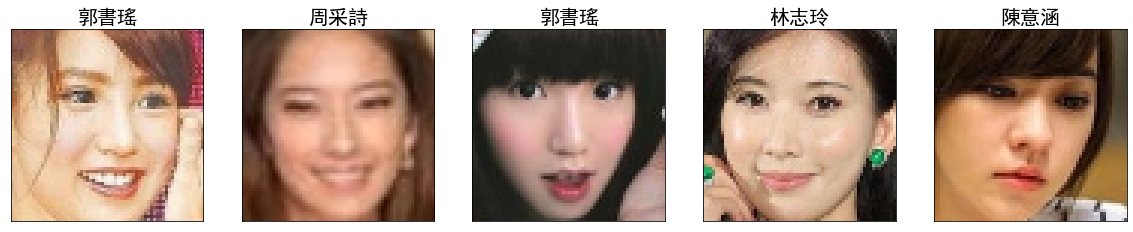

In [4]:
# plt相關參數設定
plt.rcParams['font.sans-serif'] = ['simhei'] # matplotlib的字體資料夾中必須要有「simhei」這個字體才能正常顯示中文字體
plt.rcParams['axes.unicode_minus'] = False # 可以正常顯示負號
plt.figure(figsize=(6,6)) # 畫布大小

# 隨機看訓練集中的5筆資料
pick = np.random.choice(x_train.shape[0], 5, replace=False)
plt.figure(figsize=(20,10)) # 調整畫布的大小

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[np.argmax(y_train[n])], fontsize=20)
    if CHANNEL_NUM == 3:
        plt.imshow(x_train[n], cmap='Greys') 
    elif CHANNEL_NUM == 1:
        plt.imshow(x_train[n].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')

**打造神經網路**
* 我們以Keras官網Mnist資料集的CNN範例( https://keras.io/examples/mnist_cnn/ )作為基本模型，並嘗試修改模型架構。

In [5]:
input_shape = x_train.shape[1:]
class_num = y_train.shape[1]

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


### Keras官網Mnist資料集的CNN範例 ###
# model = Sequential()

# model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(class_num, activation='softmax'))

# model.compile(loss = keras.losses.categorical_crossentropy, optimizer = 'adam', metrics = ['accuracy'])


### 最終修改後的版本 ###
keras.backend.clear_session() # 嘗試新的模型架構之前，先將舊的模型清除

from keras.layers import SpatialDropout2D

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=input_shape, activation='elu')) # relu換成elu效果更好
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))

model.add(Dense(class_num, activation='softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

Using TensorFlow backend.


**查看模型結構**

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)        

**將訓練資料的1/5(25 * 50張照片)作為驗證集，開始訓練模型(同時實施Early Stopping，以「驗證集的loss」作為監控模型的指標)**

In [7]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 0, mode = 'auto') 
    # patience：能夠容忍多少個epoch內都沒有improvement

history = model.fit(x_train, y_train, batch_size = 128, epochs = 20, validation_split = 1/5, callbacks = [early_stopping])


Train on 5000 samples, validate on 1250 samples
Epoch 1/20
5000/5000 [==============================] - 15s 3ms/step - loss: 3.9839 - accuracy: 0.0244 - val_loss: 3.8116 - val_accuracy: 0.0608
Epoch 2/20
5000/5000 [==============================] - 11s 2ms/step - loss: 3.7706 - accuracy: 0.0568 - val_loss: 3.5845 - val_accuracy: 0.1192
Epoch 3/20
5000/5000 [==============================] - 11s 2ms/step - loss: 3.5815 - accuracy: 0.0990 - val_loss: 3.3335 - val_accuracy: 0.1704
Epoch 4/20
5000/5000 [==============================] - 11s 2ms/step - loss: 3.3802 - accuracy: 0.1492 - val_loss: 3.1600 - val_accuracy: 0.1984
Epoch 5/20
5000/5000 [==============================] - 11s 2ms/step - loss: 3.1681 - accuracy: 0.1812 - val_loss: 2.9178 - val_accuracy: 0.2504
Epoch 6/20
5000/5000 [==============================] - 11s 2ms/step - loss: 2.9752 - accuracy: 0.2220 - val_loss: 2.7974 - val_accuracy: 0.2816
Epoch 7/20
5000/5000 [==============================] - 11s 2ms/step - loss: 2.79

**查看模型的訓練過程**

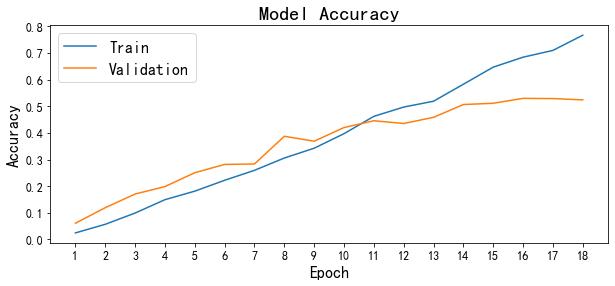

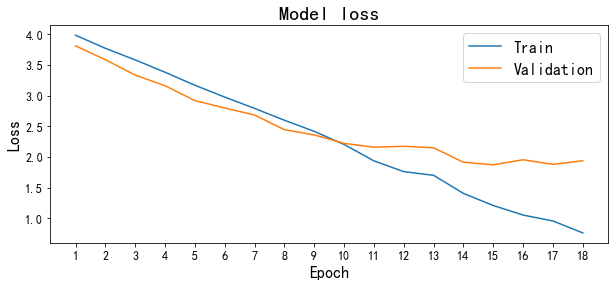

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10,4))
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize=16)
plt.xticks(np.arange(1, len(history.history['accuracy']) + 1, 1), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10,4))
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.title('Model loss', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(['Train', 'Validation'], loc='upper right', fontsize=16)
plt.xticks(np.arange(1, len(history.history['val_loss']) + 1, 1), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**決定最終的模型架構後，將驗證集加入訓練資料一同下去訓練(這部分也有同時實施Early Stopping，不過改用「測試集的loss」作為監控模型的指標)**

In [9]:
keras.backend.clear_session() # 嘗試新的模型架構之前，先將舊的模型清除


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=input_shape, activation='elu')) # relu換成elu效果更好
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))

model.add(Dense(class_num, activation='softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = 'adam', metrics = ['accuracy'])


early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 0, mode = 'auto') 

history = model.fit(
    x_train, y_train, batch_size = 128, epochs = 20, validation_data = (x_test, y_test), callbacks = [early_stopping])

Train on 6250 samples, validate on 1250 samples
Epoch 1/20
6250/6250 [==============================] - 16s 2ms/step - loss: 3.9164 - accuracy: 0.0317 - val_loss: 3.7062 - val_accuracy: 0.0968
Epoch 2/20
6250/6250 [==============================] - 14s 2ms/step - loss: 3.6655 - accuracy: 0.0742 - val_loss: 3.3440 - val_accuracy: 0.1768
Epoch 3/20
6250/6250 [==============================] - 14s 2ms/step - loss: 3.3567 - accuracy: 0.1406 - val_loss: 3.0233 - val_accuracy: 0.2280
Epoch 4/20
6250/6250 [==============================] - 14s 2ms/step - loss: 3.0579 - accuracy: 0.2010 - val_loss: 2.7731 - val_accuracy: 0.3032
Epoch 5/20
6250/6250 [==============================] - 14s 2ms/step - loss: 2.8160 - accuracy: 0.2598 - val_loss: 2.5243 - val_accuracy: 0.3624
Epoch 6/20
6250/6250 [==============================] - 14s 2ms/step - loss: 2.5246 - accuracy: 0.3269 - val_loss: 2.3439 - val_accuracy: 0.4072
Epoch 7/20
6250/6250 [==============================] - 14s 2ms/step - loss: 2.233

**查看模型預測測試集資料的結果(也可以直接看上面訓練過程最後一個Epoch的val_accuracy)**

In [11]:
score = model.evaluate(x_test, y_test)
print(f'Test loss: {score[0]: .4f}')
print(f'Test accuracy: {score[1]: .4f}')

1250/1250 [==============================] - 1s 759us/step
Test loss:  1.8724
Test accuracy:  0.5728


**用互動模式看模型預測測試集某一張圖片的結果**

In [12]:
result = model.predict_classes(x_test)

In [13]:
def my_predict(n):
    print('我的模型預測是', class_names[result[n]])
    print('實際的標籤是', class_names[np.argmax(y_test[n])])
    if CHANNEL_NUM == 3:
        X = x_test[n].reshape(64,64,3)
        plt.imshow(X)
    elif CHANNEL_NUM == 1:
        X = x_test[n].reshape(64,64)
        plt.imshow(X, 'gray')

In [14]:
from ipywidgets import interact_manual
interact_manual(my_predict, n = (0, x_test.shape[0] - 1)) 
    # (要互動的函數, 輸入的範圍)

interactive(children=(IntSlider(value=624, description='n', max=1249), Button(description='Run Interact', styl…

<function __main__.my_predict(n)>

目前我們的模型達到將近七成的準確率，然後我們可以從互動模式的結果，發現模型預測錯誤的時候，有時候是因為**照片本身本來的「神韻」就和另一位被誤認的明星有幾分相似**。另外，**很多明星的照片是以「韓系」的打扮為主**，這樣會增加模型辨識的難度，代表我們的模型有學習到臉部特徵的辨識。

未來我們可以透過以下的方式提升測試集的準確率：  
* 增加訓練照片數量 (100 → 500?)
* 更改模型架構、調參，或是直接透過別人訓練好的模型實施「遷移學習」
* 確保明星列表中的所有明星其臉部特是「鮮明」的，而且不同明星之間的臉部特徵差異要大(效果應該最為顯著)


**儲存訓練完的模型，方便未來使用**  

由於該模型是用男明星的資料下去訓練的，因此命名為「myModel_male.h5」(女明星的模型則命名為「myModel_female.h5」)。

In [15]:
# 儲存模型
model.save('myModel_female.h5')

# 儲存模型參數
model_json = model.to_json()
open('myModel_female_architecture.json', 'w').write(model_json)
model.save_weights('myModel_female_weights.h5')

# 儲存明星列表(男明星版本)
pickle_out = open("class_names_female.pickle","wb")
pickle.dump(class_names, pickle_out)
pickle_out.close()

# 4. 應用

### 4.1 定義「相似度」

現在，我們已經建立了屬於自己的明星臉部辨識模型，只要輸入一張自己的臉部照片，模型就會按照輸入照片當中的臉部特徵，從50位明星中，輸出一個模型認為和自己最像的明星名稱。但是，我們只知道自己**「長得像」**某一位明星。但自己究竟和那位明星**「有多像」**呢？為了有一個衡量指標，我們需要自己定義**「相似度」**的部分。

由於目前我們模型的輸出層是用**softmax**作為激活函數(輸出會介於0到1之間)，加上模型一共有50個類別(50位明星)，因此模型預測出來的50個值中，其最大值的範圍會介於1/50至1之間。我們可以根據這個資訊，畫出以下最基本的相似度函數：

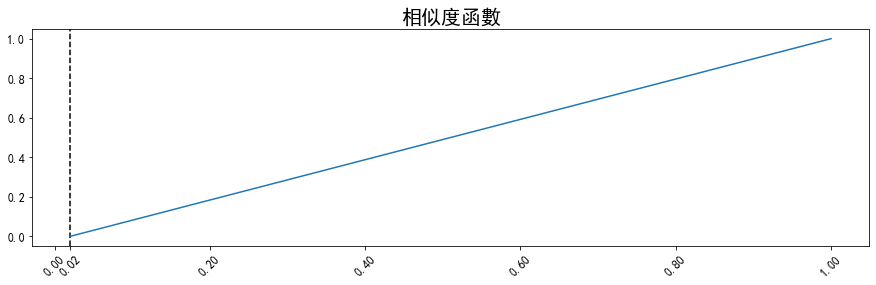

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['simhei'] # matplotlib的字體資料夾中必須要有「simhei」這個字體才能正常顯示中文字體
    
x = np.arange(1/50, 1 + 0.001, 0.001) # 上界加0.001是為了讓x的最大值等於1(np.arange取頭不取尾)
 
y = 1 / (1 - 1/50) * (x - 0.02)
 
plt.figure(figsize = (15, 4))
plt.title("相似度函數", fontsize = 20)
plt.axvline(x=1/50, color='k', linestyle='--')
plt.xticks(list(plt.xticks()[0]) + [1/50], rotation=45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.plot(x, y)
 
plt.show()

然而在我們實際測試的時候，有時模型預測出來當中的最大值會落在 [1/50, 1]比較低的地方(例如0.25~0.5之間)，那麼用這個相似度函數轉換出來的相似度很有可能不到60%，是很難說服使用者說自己的相片是真的和某位明星有幾分相似。

因此，我們修改原本的相似度函式，透過power(x, 1/n)的轉換(簡單來說就是開n次方)，將相似度函式轉變為一個遞增幅度逐漸變小的函式(輸出結果仍介於0到1之間)，這樣即使模型預測出來的最大值不怎麼高，但相似度還是能有六七成左右的水準。之後我們會將其包裝成函式方便未來使用。

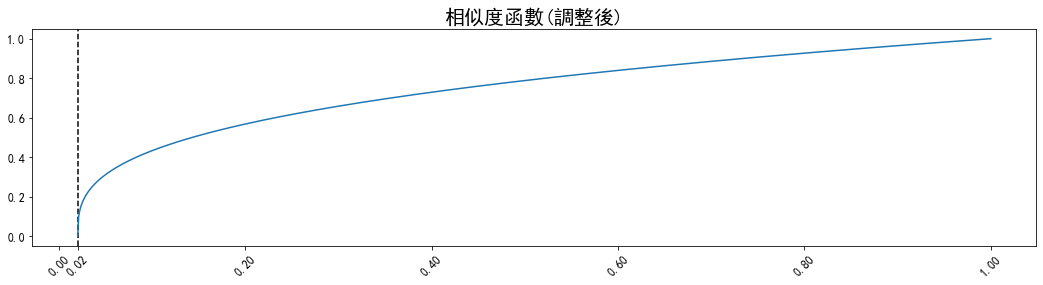

In [2]:
x = np.arange(1/50, 1 + 0.001, 0.001) # 上界加0.001是為了讓x的最大值等於1(np.arange取頭不取尾)

y = np.power(1 / (1 - 1/50) * (x - 0.02), 1/3)

plt.figure(figsize = (18, 4))
plt.title("相似度函數(調整後)", fontsize = 20)
plt.axvline(x=1/50, color='k', linestyle='--')
plt.xticks(list(plt.xticks()[0]) + [1/50], rotation=45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.plot(x, y)
 
plt.show()

以下是相似度經過調整前後的範例(假設模型輸出的最大值為0.3)

In [3]:
print(f'相似度(經經調整前)：{(1/0.98) * (np.round(np.max(0.3), 3) - 0.02) * 100: .1f}%')
print(f'相似度(經過調整後)：{np.power((1/0.98) * (np.round(np.max(0.3), 3) - 0.02), 1/5) * 100: .1f}%')

相似度(經經調整前)： 28.6%
相似度(經過調整後)： 77.8%


### 4.2 讀取自己的照片，看模型會給出什麼有趣的結果

在執行該部分的程式碼之前，需要先準備好以下的檔案：
* 明星臉部辨識模型(男生版：myModel_male.h5；女生版：myModel_female.h5)
* 明星名單(男生版：class_names_male.pickle；女生版class_names_female)
* 自己的照片(my_face.jpg，照片盡量只包含**自己的臉部區域**，預測結果會比較符合自己的臉部特徵情形)
* 裝有「明星臉部代表照片」的資料夾(男生版：imgs_face_representative_male；女生版：imgs_face_representative_female，該資料夾是組員後來手動建立的，裡面裝有每一位明星一張臉部照片，作為之後呈現結果的時候用。也可以直接用之前建立好的臉部資料集(img_face_male或是img_face_female的資料夾)，程式會根據模型預測出來的明星，自動從資料集中隨機挑選一張該明星的臉部照片作為代表)

相關檔案的載點：  
待補

**匯入套件**

In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from random import choice 

**定義相似度函數**

In [2]:
def getSimilarity(x, class_num):
    y = np.power(1 / (1 - 1 / class_num) * (x + 0.0001 - 1 / class_num), 1/3)
    return y

#### 明星臉部辨識模型

In [3]:
from tensorflow.keras.models import load_model
model = load_model('myModel_male.h5')

**讀取明星名單**

In [4]:
import pickle
pickle_in = open("class_names_male.pickle","rb")
class_names = pickle.load(pickle_in)

#### 參數設定

In [5]:
MY_FACE_IMAGE_PATH = 'my_face.jpg' # 自己的照片路徑
STAR_FACE_IMAGE_REPRESENTATIVE_FILE_PATH = 'imgs_face_representative_male' # 裝「明星臉部代表照片」的資料夾路徑
IMG_SIZE = 64 # 模型訓練時輸入的照片大小
CHANNEL_NUM = 3 # 模型訓練時輸入的照片的通道數：1 = 灰階圖片； 3 = 彩色圖片
IMG_SIZE_SHOW = 128 # 展示在程式上的照片大小(盡量不要設超過128)

#### 查看自己的照片

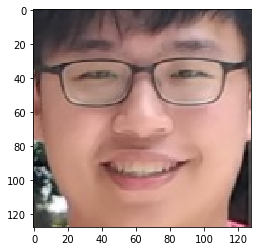

In [6]:
my_face_img = cv2.imdecode(np.fromfile(MY_FACE_IMAGE_PATH, dtype=np.uint8),-1)
my_face_img = cv2.cvtColor(my_face_img, cv2.COLOR_BGR2RGB)
my_face_img = cv2.resize(my_face_img, (IMG_SIZE_SHOW, IMG_SIZE_SHOW))
plt.imshow(my_face_img)
plt.show()

**生成模型預測結果**

In [7]:
if CHANNEL_NUM == 3:
    input_img = my_face_img.copy()
if CHANNEL_NUM == 1:
    input_img = cv2.imdecode(np.fromfile(MY_FACE_IMAGE_PATH, dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
    
input_img = cv2.resize(input_img, (IMG_SIZE, IMG_SIZE))
input_img = input_img / 255

if CHANNEL_NUM == 3:
    input_img = input_img.reshape(1, 64, 64, 3)
elif CHANNEL_NUM == 1: 
    input_img = input_img.reshape(1, 64, 64, 1)

result_my_face = model.predict_classes(input_img)
reslut_max_pred_value = np.max(model.predict(input_img))

**展示模型預測結果**

目前的明星名單：
伍佰&China Blue / 吳亦凡 / 吳克群 / 吳建豪 / 周杰倫 / 周湯豪 / 周興哲 / 孫協志 / 康康 / 張信哲 / 張學友 / 張震嶽 / 易烊千璽 / 曹格 / 李宗盛 / 李榮浩 / 李玉璽 / 林俊傑 / 林宥嘉 / 林育羣 / 楊宗緯 / 段宜恩 / 潘瑋柏 / 炎亞綸 / 王一博 / 王俊凱 / 王力宏 / 王嘉爾 / 王源 / 畢書盡Bii / 羅志祥 / 羅時豐 / 翁立友 / 肖戰 / 胡彥斌 / 華晨宇 / 蕭敬騰 / 薛之謙 / 謝和弦 / 謝霆鋒 / 辰亦儒 / 阿杜 / 陳奕迅 / 陳零九 / 陶喆 / 韋禮安 / 鹿晗 / 黃子韜 / 黃明志 / 黃鴻升

你的臉最像哪一位明星名單中的明星：謝和弦
相似度： 92.0%


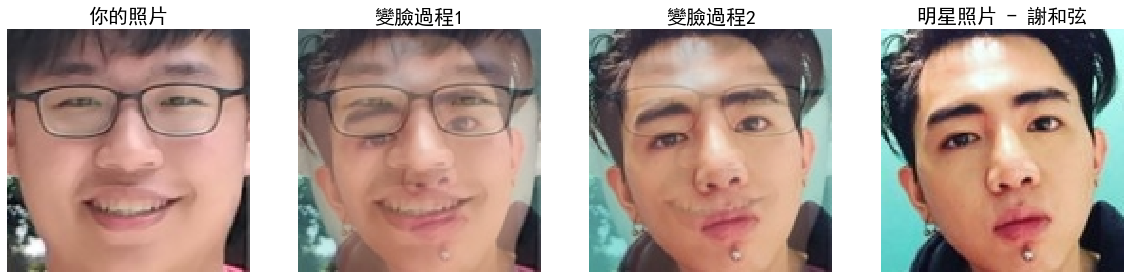

In [8]:
### 預測結果相關資訊 ###
print(f'目前的明星名單：\n{" / ".join(class_names)}')
print()
print(f'你的臉最像哪一位明星名單中的明星：{class_names[result_my_face[0]]}')
print(f'相似度：{getSimilarity(reslut_max_pred_value, len(class_names)) * 100: .1f}%')
#print(f'相似度(模型輸出原始值)：{reslut_max_pred_value: .3f}')
      
### plt相關設定 ###

plt.rcParams['font.sans-serif'] = ['simhei'] # matplotlib的字體資料夾中必須要有「simhei」這個字體才能正常顯示中文字體
plt.subplots(figsize=(20, 8))

### 自己的照片 ###

plt.subplot(141)
plt.title("你的照片", fontsize = 20)
plt.imshow(my_face_img)
plt.axis('off')

### 明星照片 ###

# 根據模型預測出來的明星，從資料集中隨機挑選一張該明星的臉部照片
star_image_size = 0
while star_image_size < IMG_SIZE_SHOW * 0.8 * IMG_SIZE_SHOW * 0.8: # 避免選到的照片解析度太低
    star_image_path_name = choice(
        os.listdir(os.path.join(STAR_FACE_IMAGE_REPRESENTATIVE_FILE_PATH, class_names[result_my_face[0]])))
    star_image_path_path = os.path.join(
        STAR_FACE_IMAGE_REPRESENTATIVE_FILE_PATH, class_names[result_my_face[0]], star_image_path_name)
    star_face_img = cv2.imdecode(np.fromfile(star_image_path_path , dtype=np.uint8),-1)
    star_image_size = star_face_img.shape[0] * star_face_img.shape[1]

star_face_img = cv2.cvtColor(star_face_img, cv2.COLOR_BGR2RGB)
star_face_img = cv2.resize(star_face_img, (IMG_SIZE_SHOW, IMG_SIZE_SHOW))
plt.subplot(144)
plt.title(f"明星照片 - {class_names[result_my_face[0]]}", fontsize = 20)
plt.imshow(star_face_img)
plt.axis('off')

### 變臉過程照片 ###
img_add1 = cv2.addWeighted(my_face_img, 0.66, star_face_img, 0.33, gamma = 0)
plt.subplot(142)
plt.title("變臉過程1", fontsize = 20)
plt.imshow(img_add1)
plt.axis('off')

img_add2 = cv2.addWeighted(my_face_img, 0.33, star_face_img, 0.66, gamma = 0)
plt.subplot(143)
plt.title("變臉過程2", fontsize = 20)
plt.imshow(img_add2)
plt.axis('off')

plt.show()